# Coursera Course Analysis

- Which are the highest rated courses, is there any correlation with the students enrolled?
- Which organizations have more courses
- Which organizations has more ratings
- What's the average rating per organization, which organization have more ratings and more students enrolled?
- How many different coursers are there?
- How is the difficulty relevant?

In [25]:
# Importing libraries and dataset from Coursera Courses

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

df = pd.read_csv('sample_data/coursea_data.csv', index_col=0).sort_index()
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


### Cleaning and basic exploring

In [26]:
# Tidying up dataset column names by removing course since we already defined that this is a coursera 
# course dataset.

df.columns = df.columns.str.replace('course_', '').str.lower()
df.columns

Index(['title', 'organization', 'certificate_type', 'rating', 'difficulty',
       'students_enrolled'],
      dtype='object')

In [27]:
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} features.')

This dataset has 891 observations and 6 features.


In [28]:
# Checking if there is any empty value in the dataset
df.isnull().any()

title                False
organization         False
certificate_type     False
rating               False
difficulty           False
students_enrolled    False
dtype: bool

In [29]:
# Checking if there is any duplicated in the dataset

df.duplicated().any()

False

In [30]:
# Checking each feature datatype to adjust if needed

df.dtypes

title                 object
organization          object
certificate_type      object
rating               float64
difficulty            object
students_enrolled     object
dtype: object

In [31]:
# Most of the columns might have mixed data types. We will work with string datatype for the
# storing columns: title, organization, certificate_type and course difficuly.
# for the rating and students_enrolled column we need them as floats.

df = df.astype({"title": 'string', "organization": 'string', "certificate_type": 'string', "difficulty": 'string'})
df.dtypes

title                 string
organization          string
certificate_type      string
rating               float64
difficulty            string
students_enrolled     object
dtype: object

In [32]:
# Exploring students_enrolled column to convert all to floats
df['students_enrolled']

0      480k
1      310k
2      2.5m
3      1.5m
4      350k
       ... 
886     11k
887     33k
888    6.6k
889     45k
890    6.4k
Name: students_enrolled, Length: 891, dtype: object

In [48]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0

df['students_enrolled'] = df['students_enrolled'].apply(value_to_float)
df['students_enrolled']

0       480000.0
1       310000.0
2      2500000.0
3      1500000.0
4       350000.0
         ...    
886      11000.0
887      33000.0
888       6600.0
889      45000.0
890       6400.0
Name: students_enrolled, Length: 891, dtype: float64

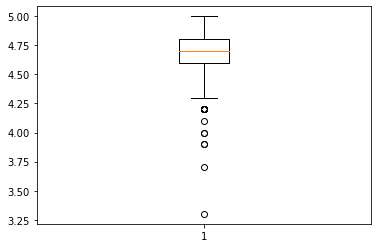

In [49]:
# Checking outliers for rating and students_enrolled
plt.boxplot(df['rating'])
plt.show()

In [50]:
# Checking all courses less than 4.25
df[df['rating'] < 4.25].count()

title                17
organization         17
certificate_type     17
rating               17
difficulty           17
students_enrolled    17
dtype: int64

In [51]:
# What's the average of students enrolled for ratings under 4.25? 
# Which are the highest rated courses is there any correlation with the students enrolled?
df[df['rating'] < 4.25]

mean_low_ratings = df.loc[(df['rating'] < 4.25), 'students_enrolled'].mean()
mean_high_ratings = df.loc[((df['rating'] > 4.25)), 'students_enrolled'].mean()
mean_low_ratings, mean_high_ratings

(57482.35294117647, 91195.30892448513)

,rating,students_enrolled
rating,1.00000,0.07109
students_enrolled,0.07109,1.00000


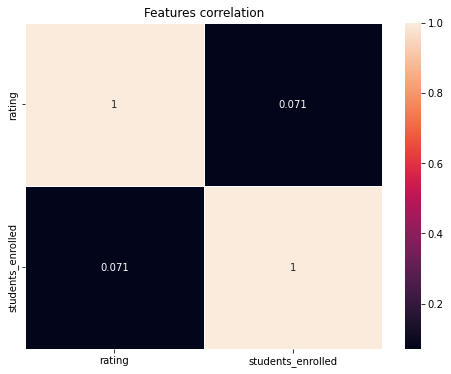

In [52]:
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')
df.corr()

In [53]:
# Cleare we can see that the correlation between rating and students_enrolled is very low
# but generally the courses that are higher rated has a higher mean of students enrolled

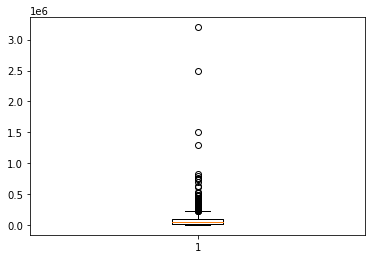

In [54]:
plt.boxplot(df['students_enrolled'])
plt.show()

In [41]:
# Most of the courses has less than 200.000 students enrolled. Not considering courses above 200.000 students
# enrolled an outlier

In [42]:
# Exploring Certificate_type and course_difficulty column to assure there's not wrong value
df['difficulty'].unique()

<StringArray>
['Beginner', 'Mixed', 'Intermediate', 'Advanced']
Length: 4, dtype: string

In [43]:
df['certificate_type'].unique()

<StringArray>
['PROFESSIONAL CERTIFICATE', 'SPECIALIZATION', 'COURSE']
Length: 3, dtype: string

In [44]:
print(f" There's {len(df['difficulty'].unique())} types of difficulty level and {len(df['certificate_type'].unique())} types of certificates")

 There's 4 types of difficulty level and 3 types of certificates


In [45]:
df.head()

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0


## Exploring further the data and visualizing some relevant data


- Which courses has more students enrolled?


- Which type of certificate has more ratings?
- Which type of certificate students tend to enroll?


- How is the difficulty relevant?
- How many types of certificates are there


- How many organizations are doing courses?
- What organizations have more courses? and which ones less?
- How many courses of each certificate type have each organization?
- What's the average rating per organization and which organization have the highest 
ratings average and more students enrolled? Which one has the lowest students enrolled and have the highest ratings?
- Which are the TOP organizations?

In [56]:
# We will describe the values in the rating column
df['rating'].describe()

count    891.000000
mean       4.677329
std        0.162225
min        3.300000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: rating, dtype: float64

In [62]:
# We will describe the values in the enrolled students column
df['students_enrolled'].describe()

count    8.910000e+02
mean     9.055208e+04
std      1.819365e+05
min      1.500000e+03
25%      1.750000e+04
50%      4.200000e+04
75%      9.950000e+04
max      3.200000e+06
Name: students_enrolled, dtype: float64

In [46]:
# How many organizations are doing courses at Coursera?
print(f" There's {len(df['organization'].unique())} organizations that has courses in Coursera")

 There's 154 organizations that has courses in Coursera


In [47]:
# What organizations have more courses at Coursera? 

org_courses = df['organization'].value_counts().sort_values(ascending=False)
org_courses
# Organizations that has more than 1 course


University of Pennsylvania                      59
University of Michigan                          41
Google Cloud                                    34
Duke University                                 28
Johns Hopkins University                        28
                                                ..
Bloomsbury Learning Exchange                     1
JetBrains                                        1
Nanyang Technological University, Singapore      1
Royal Holloway, University of London             1
American Institute of Business and Economics     1
Name: organization, Length: 154, dtype: Int64

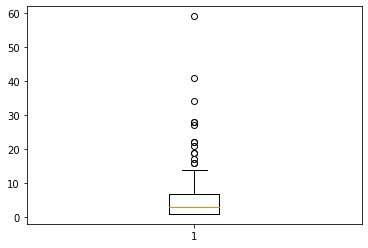

In [63]:
# Let's quick check how the data is distributed with a box plot
plt.boxplot(org_courses)
plt.show()

In [64]:
# Most of the organizations has less than 15 courses in Coursera.

In [ ]:
# df.groupby('artist')['album'].count().sort_values(ascending=False)
# [org for org in df['organization'].unique()]